This analysis helps in predicting the accurate regression model for rocket launch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d=pd.read_excel('/content/drive/MyDrive/decision tree.xlsx')
d.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class
0,1,6104.959412,0,1,1,0,0,0,1,0,-80.577366,28.561857,0
1,2,525.000000,0,1,1,0,0,0,1,0,-80.577366,28.561857,0
2,3,677.000000,1,1,1,0,0,0,1,0,-80.577366,28.561857,0
3,4,500.000000,2,2,1,0,0,0,1,0,-120.610829,34.632093,0
4,5,3170.000000,3,1,1,0,0,0,1,0,-80.577366,28.561857,0


In [45]:
x=d.iloc[:,1:4]
y=d.iloc[:,2:3]
y.head()

,Orbit
0,0
1,0
2,1
3,2
4,3


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)

In [47]:
print(x_train)

     PayloadMass  Orbit  LaunchSite
86  15400.000000      8           3
13   1898.000000      1           1
16   2034.000000      0           1
18   5271.000000      3           1
30   6070.000000      3           3
..           ...    ...         ...
28   5300.000000      3           3
0    6104.959412      0           1
5    3325.000000      3           1
12    570.000000      4           1
72   6104.959412      9           3

[72 rows x 3 columns]


In [48]:
print(x_test)

     PayloadMass  Orbit  LaunchSite
76  15600.000000      8           3
46   9600.000000      2           2
59   2573.000000      1           1
57   3000.000000      3           3
48    350.000000      6           1
69   5000.000000      1           1
8    4535.000000      3           1
14   4707.000000      3           1
9    4428.000000      3           1
73  15600.000000      8           1
25   9600.000000      2           2
87  15400.000000      8           3
38   9600.000000      2           2
3     500.000000      2           2
20   4696.000000      3           1
45   6092.000000      3           1
43   6104.959412      0           1
52   7076.000000      3           1


In [49]:
print(y_train)
print(y_train.shape)

    Orbit
86      8
13      1
16      0
18      3
30      3
..    ...
28      3
0       0
5       3
12      4
72      9

[72 rows x 1 columns]
(72, 1)


In [50]:
print(y_test)

    Orbit
76      8
46      2
59      1
57      3
48      6
69      1
8       3
14      3
9       3
73      8
25      2
87      8
38      2
3       2
20      3
45      3
43      0
52      3


In [51]:
from sklearn.tree import DecisionTreeRegressor


In [52]:
dt=DecisionTreeRegressor()
cc=dt.fit(x_train,y_train)
from sklearn.metrics import mean_squared_error as MSE
yp=dt.predict(x_test)
mse_dt=MSE(y_test,yp)
rms=mse_dt**(1/2)
print(rms)

0.23570226039551584


[Text(0.47058823529411764, 0.9, 'X[1] <= 4.5\nsquared_error = 7.66\nsamples = 72\nvalue = 3.417'),
 Text(0.23529411764705882, 0.7, 'X[1] <= 1.5\nsquared_error = 1.283\nsamples = 51\nvalue = 1.824'),
 Text(0.11764705882352941, 0.5, 'X[1] <= 0.5\nsquared_error = 0.182\nsamples = 25\nvalue = 0.76'),
 Text(0.058823529411764705, 0.3, 'squared_error = 0.0\nsamples = 6\nvalue = 0.0'),
 Text(0.17647058823529413, 0.3, 'squared_error = 0.0\nsamples = 19\nvalue = 1.0'),
 Text(0.35294117647058826, 0.5, 'X[1] <= 2.5\nsquared_error = 0.207\nsamples = 26\nvalue = 2.846'),
 Text(0.29411764705882354, 0.3, 'squared_error = 0.0\nsamples = 5\nvalue = 2.0'),
 Text(0.4117647058823529, 0.3, 'X[1] <= 3.5\nsquared_error = 0.045\nsamples = 21\nvalue = 3.048'),
 Text(0.35294117647058826, 0.1, 'squared_error = 0.0\nsamples = 20\nvalue = 3.0'),
 Text(0.47058823529411764, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 4.0'),
 Text(0.7058823529411765, 0.7, 'X[1] <= 6.0\nsquared_error = 2.014\nsamples = 21\nvalue = 

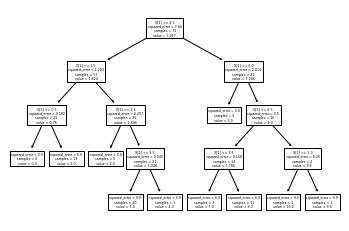

In [53]:
  from sklearn import tree
  tree.plot_tree(cc)

In [54]:
from sklearn.svm import SVR


In [55]:
svm_regression=SVR()
svm_regression.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [56]:
yfit=svm_regression.predict(x)


In [57]:
score=svm_regression.score(x,y)
svm_mean=MSE(y,yfit)
print(svm_mean)

3.761269142061393


In [58]:
print('The MSE using DECISION TREE:',rms)
print('The MSE using SVM:',svm_mean)


The MSE using DECISION TREE: 0.23570226039551584
The MSE using SVM: 3.761269142061393
